# AI-Based Chronic Kidney Disease (CKD) Prediction


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Load the CKD dataset
df = pd.read_csv("ckd.csv", header=None)

# Assign column names as per UCI dataset description
df.columns = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod',
              'pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','classification']

# Display first few rows
df.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
1,48,80,1.02,1,0,normal,normal,notpresent,notpresent,121,...,44,7800,5.2,no,no,no,good,no,no,ckd
2,7,50,1.02,4,0,normal,normal,notpresent,notpresent,100,...,38,6000,4.5,no,no,no,good,no,no,notckd
3,62,80,1.01,2,4,abnormal,abnormal,present,notpresent,423,...,31,7500,3.9,yes,yes,no,poor,yes,yes,ckd
4,48,70,1.005,3,0,abnormal,normal,notpresent,notpresent,117,...,32,6700,3.7,yes,no,no,good,no,yes,ckd


In [11]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Fill missing values (basic approach)
df.fillna(method='ffill', inplace=True)

# Convert categorical columns to numeric using Label Encoding
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             6 non-null      int32
 1   bp              6 non-null      int32
 2   sg              6 non-null      int32
 3   al              6 non-null      int32
 4   su              6 non-null      int32
 5   rbc             6 non-null      int32
 6   pc              6 non-null      int32
 7   pcc             6 non-null      int32
 8   ba              6 non-null      int32
 9   bgr             6 non-null      int32
 10  bu              6 non-null      int32
 11  sc              6 non-null      int32
 12  sod             6 non-null      int32
 13  pot             6 non-null      int32
 14  hemo            6 non-null      int32
 15  pcv             6 non-null      int32
 16  wbcc            6 non-null      int32
 17  rbcc            6 non-null      int32
 18  htn             6 non-null      in

C:\Users\Sushmitha K A\AppData\Local\Temp\ipykernel_18972\2066088683.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [12]:
# Split dataset into features and target
X = df.drop('classification', axis=1)
y = df['classification']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0
Confusion Matrix:
 [[0 0 1]
 [0 0 1]
 [0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



d:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is il

In [15]:
# Save model to disk
joblib.dump(model, "ckd_model.pkl")

['ckd_model.pkl']

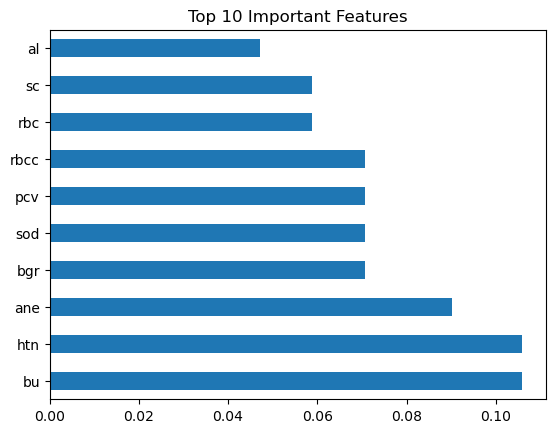

In [16]:
# Plot feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
